In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#torch.manual_seed(2)

bs = 3000 # N
n = 1000 # d
dt = 1/100
h = .693

m  = torch.ones(n, device=device)
a  = lambda t: n ** (1/2) * (1-t)
ap = lambda t: -n ** (1/2)
b  = lambda t: t
bp = lambda t: 1
c  = n ** (1/2)


np.random.seed(1)
xp = np.random.randn(bs,n).T * c
x = torch.tensor(xp, device=device, dtype = torch.float)
xs = [x.cpu().numpy()]
ms = [np.sum(xs[0], axis=0)]
ps = [np.mean(ms[0]>0)]

def bf(x, t):
    x_coef    = (a(t) * ap(t) + b(t) * bp(t)) / (a(t)**2 + b(t)**2)
    tanh_coef = a(t) * (bp(t) * a(t) - b(t) * ap(t)) / (a(t)**2 + b(t)**2)
    tanh_term = torch.tanh(h + b(t) * (m @ x) / (a(t)**2 + b(t)**2))
    return x_coef * x + tanh_coef * torch.outer(m, tanh_term)

ts = np.arange(0, 1, dt)
for t in ts:
    x = x + bf(x, t) * dt
    mm = np.sum(x.cpu().numpy(), axis=0)
    p = np.mean(mm > 0)
    ps.append(p)
    #xs.append(x.cpu().numpy())
       
ps = np.array(ps)

In [10]:
ps

array([0.49033333, 0.493     , 0.49566667, 0.49766667, 0.5       ,
       0.505     , 0.508     , 0.509     , 0.51166667, 0.51433333,
       0.51566667, 0.518     , 0.522     , 0.52733333, 0.53133333,
       0.53466667, 0.53833333, 0.544     , 0.546     , 0.54833333,
       0.552     , 0.55466667, 0.55733333, 0.561     , 0.56466667,
       0.56866667, 0.573     , 0.57733333, 0.58      , 0.58266667,
       0.58433333, 0.58966667, 0.59533333, 0.6       , 0.607     ,
       0.61133333, 0.616     , 0.61933333, 0.62566667, 0.631     ,
       0.63766667, 0.64166667, 0.64466667, 0.65266667, 0.657     ,
       0.66433333, 0.667     , 0.67566667, 0.683     , 0.69033333,
       0.69633333, 0.70433333, 0.71033333, 0.716     , 0.721     ,
       0.729     , 0.73333333, 0.73966667, 0.74333333, 0.74733333,
       0.75333333, 0.75666667, 0.763     , 0.76766667, 0.76933333,
       0.773     , 0.778     , 0.78066667, 0.784     , 0.78733333,
       0.78933333, 0.79133333, 0.79133333, 0.79266667, 0.79466

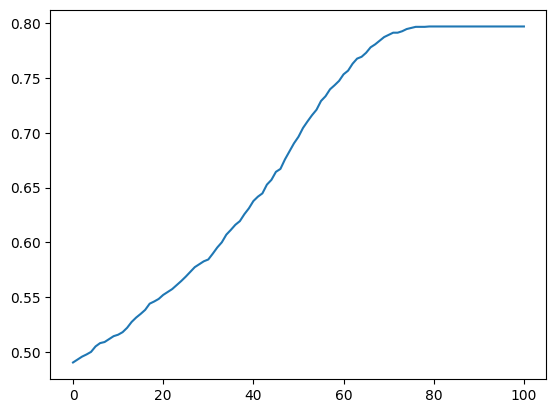

In [9]:
plt.plot(ps)